In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset path
dataset_path = r"D:\Infosys SpringBoard Virtual Internship 6.0\US_Accidents_March23.csv"

# Load data
accidents_df = pd.read_csv(dataset_path)
print(f"Dataset loaded successfully with shape: {accidents_df.shape}")


Dataset loaded successfully with shape: (7728394, 46)


In [22]:
# Convert latitude/longitude to numeric
accidents_df['Start_Lat'] = pd.to_numeric(accidents_df['Start_Lat'], errors='coerce')
accidents_df['Start_Lng'] = pd.to_numeric(accidents_df['Start_Lng'], errors='coerce')

# Drop rows with missing coordinates
geo_df = accidents_df.dropna(subset=['Start_Lat', 'Start_Lng'])
print(f"Number of records with valid coordinates: {geo_df.shape[0]}")


Number of records with valid coordinates: 7728394


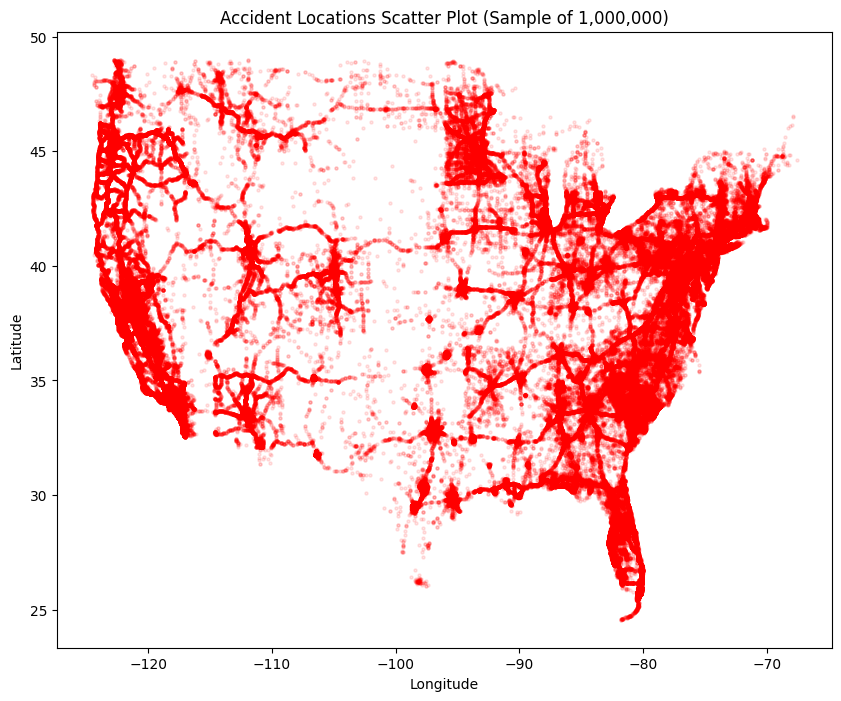

In [23]:
plt.figure(figsize=(10, 8))
sample_df = geo_df.sample(n=1000000, random_state=42)  # sample for performance
plt.scatter(sample_df['Start_Lng'], sample_df['Start_Lat'], alpha=0.1, s=5, c='red')
plt.title('Accident Locations Scatter Plot (Sample of 1,000,000)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


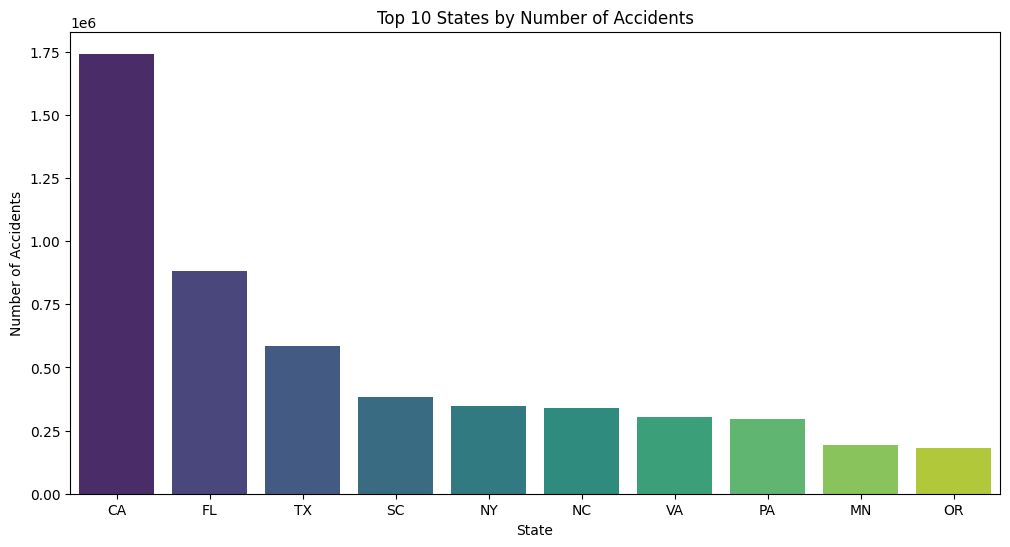

In [24]:
state_counts = geo_df['State'].value_counts().sort_values(ascending=False)

# Create a DataFrame for top 10 states
top_states_df = state_counts.head(10).reset_index()
top_states_df.columns = ['State', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=top_states_df, x='State', y='Count', hue='State', palette='viridis', legend=False)
plt.title('Top 10 States by Number of Accidents')
plt.ylabel('Number of Accidents')
plt.xlabel('State')
plt.show()


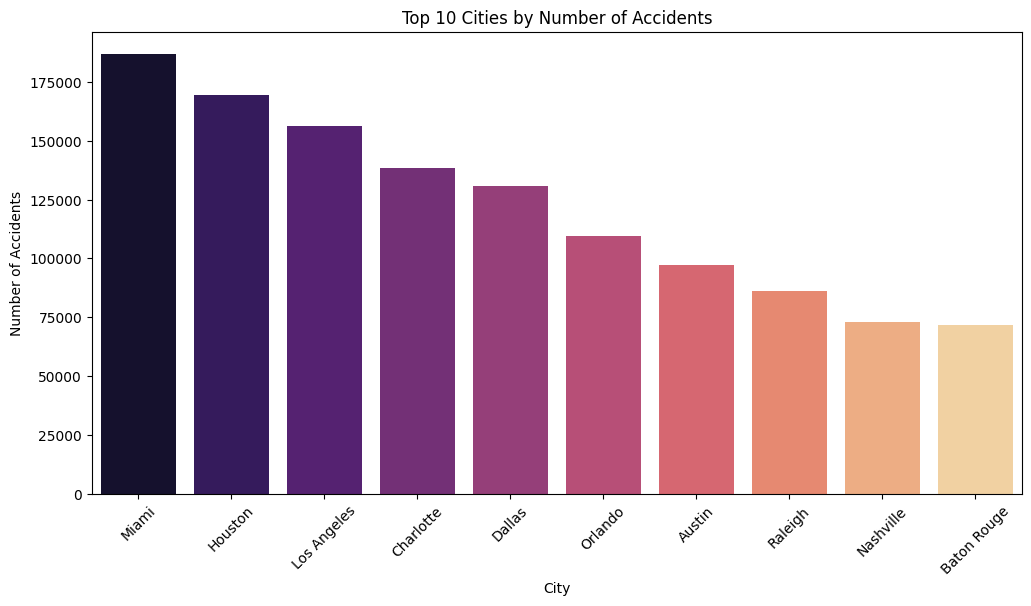

In [25]:
city_counts = geo_df['City'].value_counts().sort_values(ascending=False).head(10)

# Create a DataFrame to enable use of hue and palette without warning
city_df = city_counts.reset_index()
city_df.columns = ['City', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=city_df, x='City', y='Count', hue='City', legend=False, palette='magma')
plt.title('Top 10 Cities by Number of Accidents')
plt.ylabel('Number of Accidents')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.show()


In [26]:
top_5_states = state_counts.head(5)
top_5_cities = city_counts.head(5)

print("Top 5 Accident-Prone States:")
print(top_5_states)

print("\nTop 5 Accident-Prone Cities:")
print(top_5_cities)


Top 5 Accident-Prone States:
State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
Name: count, dtype: int64

Top 5 Accident-Prone Cities:
City
Miami          186917
Houston        169609
Los Angeles    156491
Charlotte      138652
Dallas         130939
Name: count, dtype: int64


In [27]:
## Exploratory Data Analysis (EDA) Q&A


In [28]:
## Q1. What is the distribution of accidents by Hour of the Day?


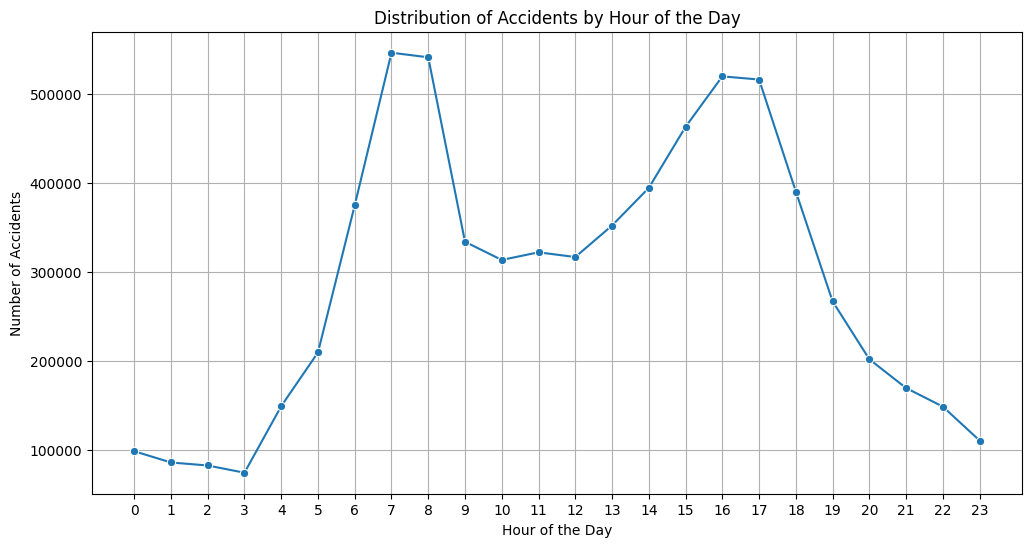

In [29]:
# Convert 'Start_Time' to datetime
accidents_df['Start_Time'] = pd.to_datetime(accidents_df['Start_Time'], errors='coerce')

# Extract hour
accidents_df['Hour'] = accidents_df['Start_Time'].dt.hour

# Count by hour
hourly_counts = accidents_df['Hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o')
plt.title('Distribution of Accidents by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.grid()
plt.show()


In [30]:
## Q2. How does accident severity distribute across different States?


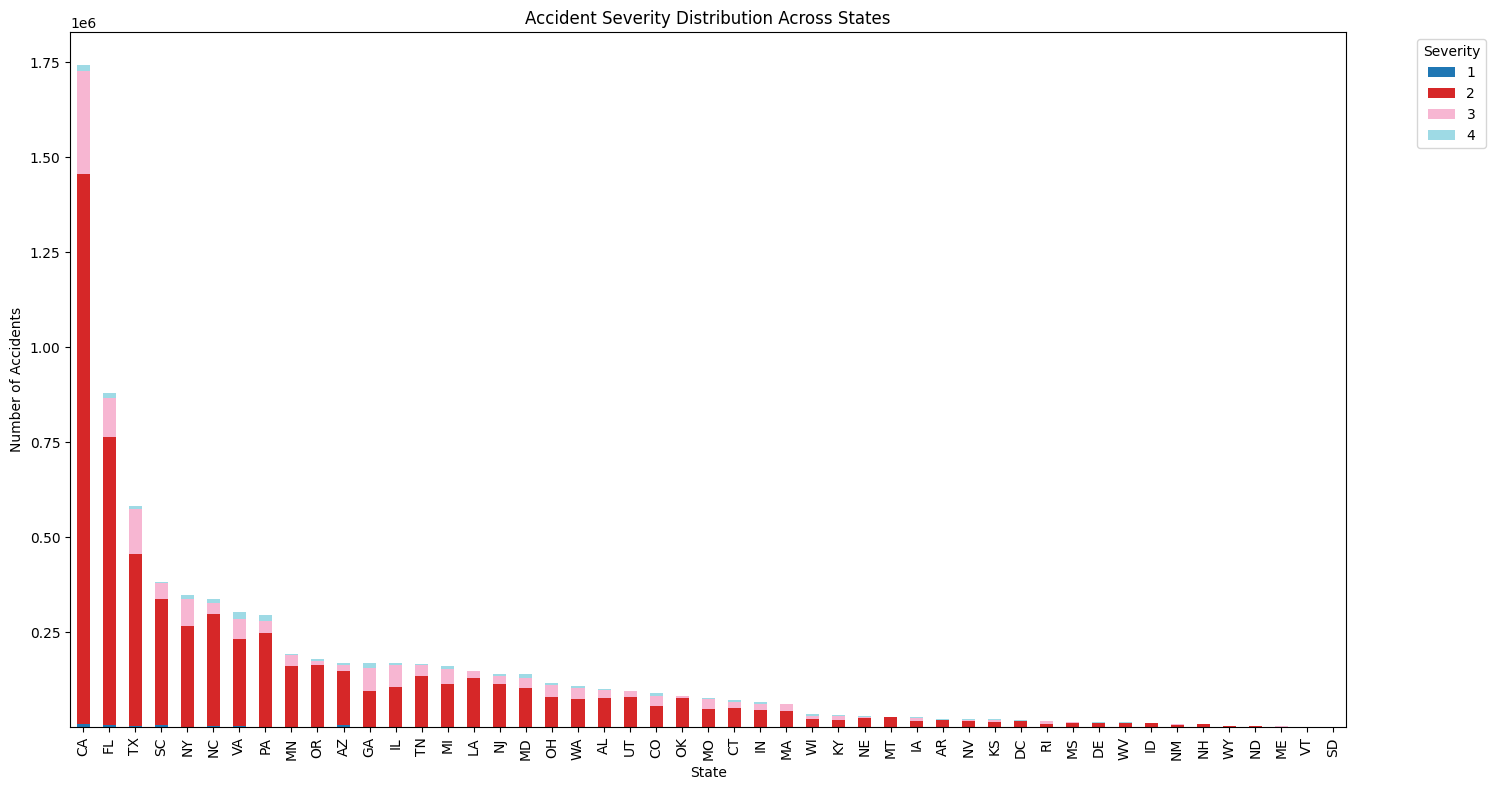

In [31]:
severity_state_counts = accidents_df.groupby(['State', 'Severity']).size().unstack(fill_value=0)

# Sort by total accidents
severity_state_counts = severity_state_counts.loc[severity_state_counts.sum(axis=1).sort_values(ascending=False).index]

severity_state_counts.plot(kind='bar', stacked=True, colormap='tab20', figsize=(15, 8))
plt.title('Accident Severity Distribution Across States')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [32]:
## Q3. What weather conditions are associated with the highest accident severity?


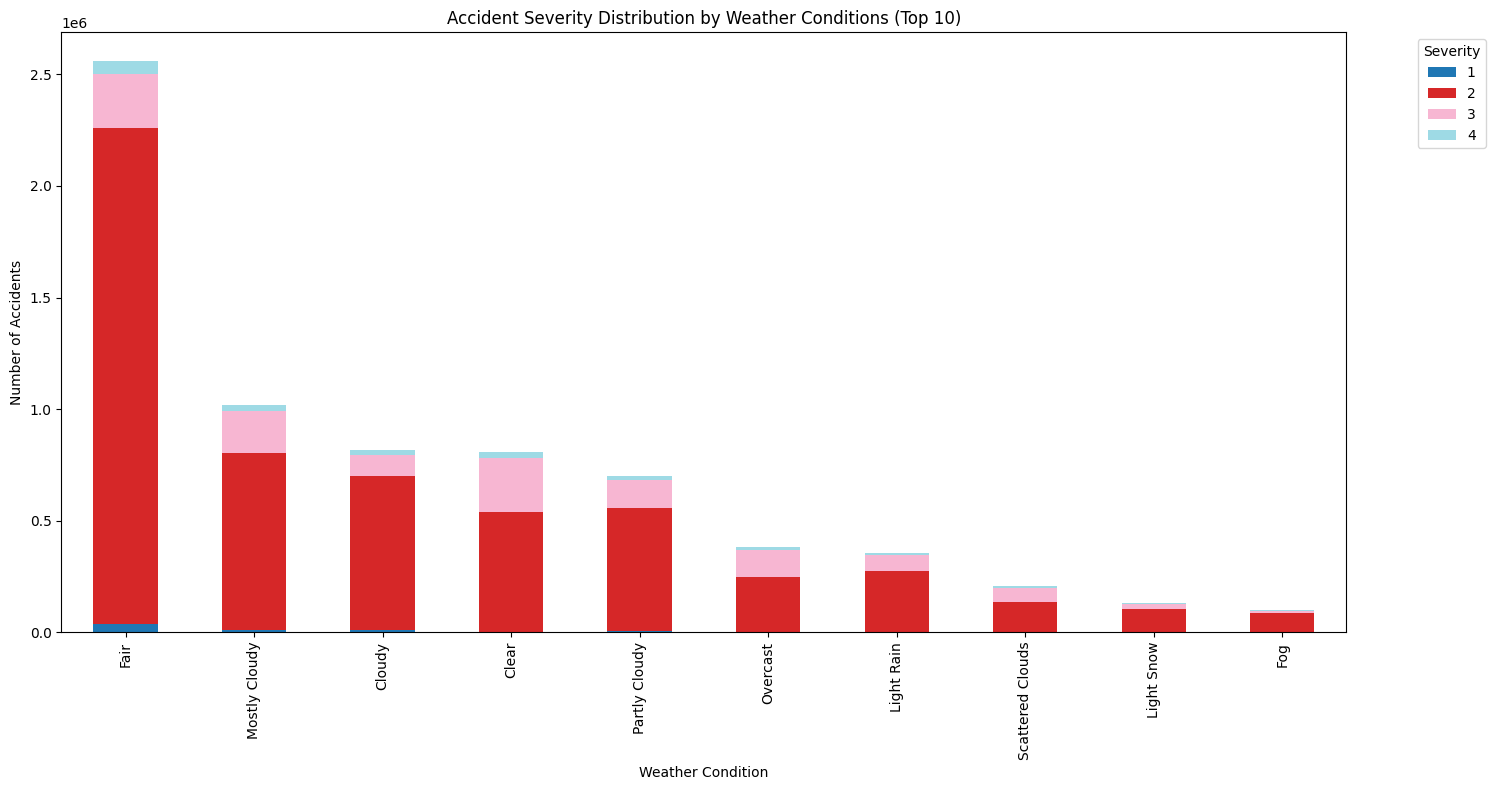

In [33]:
weather_severity_counts = accidents_df.groupby(['Weather_Condition', 'Severity']).size().unstack(fill_value=0)

# Top 10 weather conditions
top_weather_conditions = weather_severity_counts.sum(axis=1).sort_values(ascending=False).head(10).index
filtered_weather_severity = weather_severity_counts.loc[top_weather_conditions]

filtered_weather_severity.plot(kind='bar', stacked=True, colormap='tab20', figsize=(15, 8))
plt.title('Accident Severity Distribution by Weather Conditions (Top 10)')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [34]:
## Q4. How many accidents occur during Day vs Night? (Sunrise_Sunset column)


C:\Users\syamc\AppData\Local\Temp\ipykernel_14304\969794223.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_night_counts.index, y=day_night_counts.values, hue=None, legend=False, palette='coolwarm')


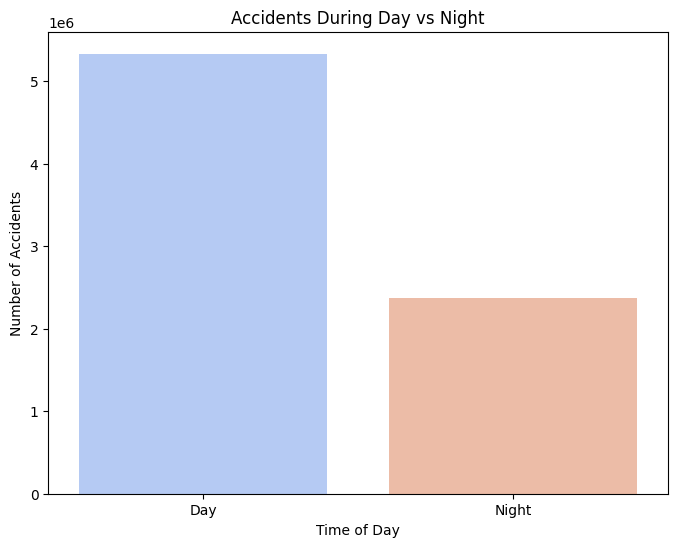

In [35]:
day_night_counts = accidents_df['Sunrise_Sunset'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=day_night_counts.index, y=day_night_counts.values, hue=None, legend=False, palette='coolwarm')
plt.title('Accidents During Day vs Night') 
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.show()


In [36]:
## Q5. Distribution of accidents on different Days of the Week


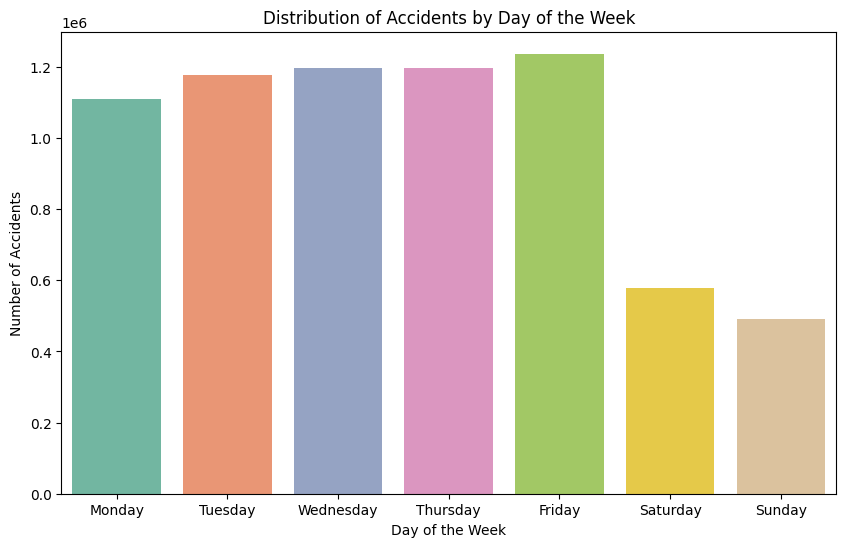

In [37]:
accidents_df['Day_of_Week'] = accidents_df['Start_Time'].dt.day_name()

day_of_week_counts = accidents_df['Day_of_Week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Convert to DataFrame to allow hue usage
day_df = day_of_week_counts.reset_index()
day_df.columns = ['Day', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=day_df, x='Day', y='Count', hue='Day', legend=False, palette='Set2')
plt.title('Distribution of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()


In [38]:
## Q6. Are certain traffic features associated with accident counts?


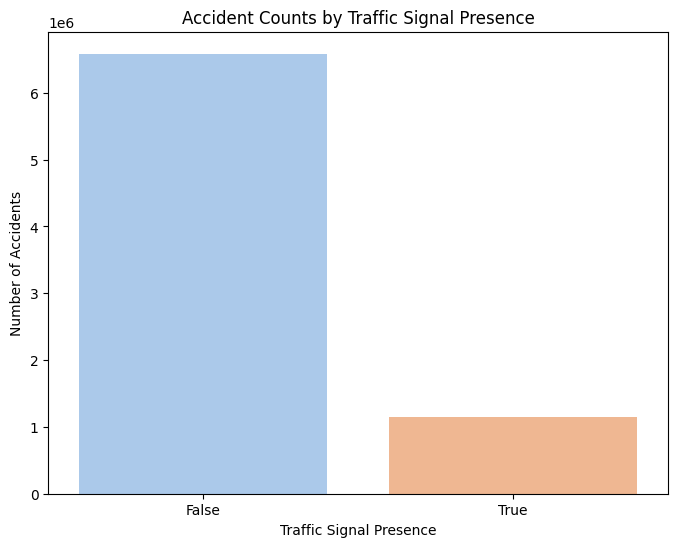

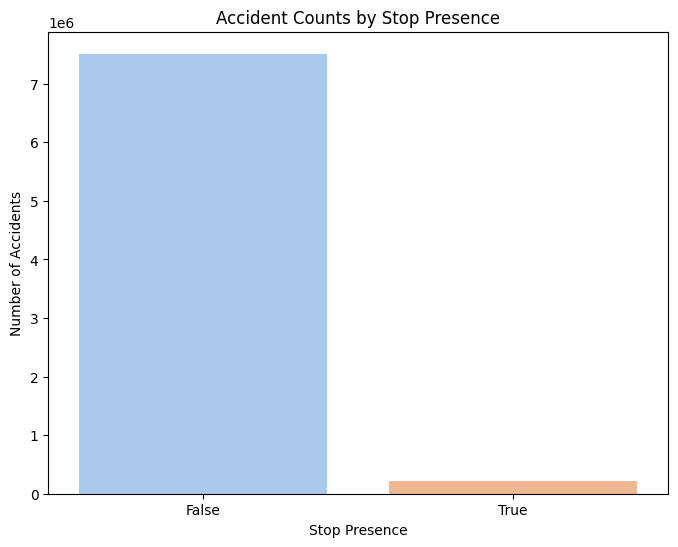

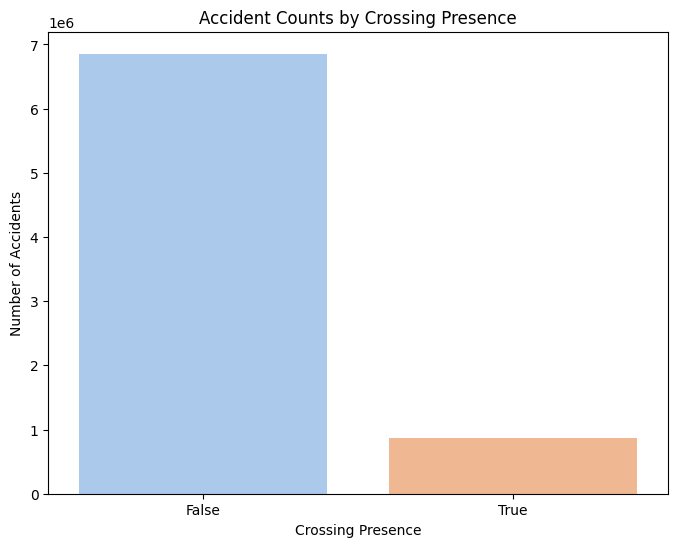

In [39]:
traffic_features = ['Traffic_Signal', 'Stop', 'Crossing']

for feature in traffic_features:
    counts = accidents_df[feature].value_counts()
    feature_df = counts.reset_index()
    feature_df.columns = [feature, 'Count']
    feature_df[feature] = feature_df[feature].astype(str)

    plt.figure(figsize=(8, 6))
    sns.barplot(data=feature_df, x=feature, y='Count', hue=feature, legend=False, palette='pastel')
    plt.title(f'Accident Counts by {feature.replace("_", " ")} Presence')
    plt.xlabel(f'{feature.replace("_", " ")} Presence')
    plt.ylabel('Number of Accidents')
    plt.show()
